In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\moreilly1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\moreilly1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\moreilly1\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# #3
The issue is that Harvard's president, Claudine Gay, inadequately cited information in her academic writings. She had already faced backlash as a result of a Senate hearing when she refused to say outright "that calling for the genocide of Jews on Harvard's campus would violate the school's code of conduct" (Reuters). Many are upset at the thought of Harvard's president not being held to the same standards as its students when it comes to plagarism. The Fox News article feels more like an attack on Gay's character, while the Reuters article seems more objective.

# #4. Extracting Text

In [298]:
def extract_all_text_from_pdf(fox_path):
    text = ""
    with open(fox_path, 'rb') as pdf_file:
        reader = PdfReader(pdf_file)
        for page in reader.pages:
            text += page.extract_text() + "\n"
    return text

fox_path = 'data/foxnews.com-Embattled Harvard University President Claudine Gay hit with more plagiarism charges.pdf'
fox_text = extract_all_text_from_pdf(fox_path)
print(fox_text)

1 / 5Brian FloodEmbattled Harvard University President Claudine Gay hit
with more plagiarism charges
foxnews.com /media/embattled-harvard-university-president-claudine-gay-hit-more-plagiarism-charges
Media
Harvard ‘received a complaint outlining over 40 allegations of
plagiarism,’ according to the Free Beacon
 By Brian Flood  Fox News
Published December 20, 2023 12:59pm EST
Harvard president facing 40 new allegations of plagiarism
Fox News' Molly Line reports the latest on the allegations. 
Embattled Harvard University President Claudine Gay  has been slapped with additional
charges of plagiarism. 
The Washington Free Beacon  reported Harvard "received a complaint outlining over 40
allegations of plagiarism" against Gay on T uesday , noting a letter was sent to Harvard's
research integrity of ficer, Stacey Springs, outlining the claims. 
"The document paints a picture of a pattern of misconduct more extensive than has been
previously reported and puts the Harvard Corporation, the unive

In [300]:
def extract_all_text_from_pdf(r_path):
    text = ""
    with open(r_path, 'rb') as pdf_file:
        reader = PdfReader(pdf_file)
        for page in reader.pages:
            text += page.extract_text() + "\n"
    return text

r_path = 'data/reuters.com-Harvard president will submit dissertation edits after plagiarism allegations.pdf'
r_text = extract_all_text_from_pdf(r_path)
print(r_text)

1 / 3Gabriella BorterHarvard president will submit dissertation edits after
plagiarism allegations
reuters.com /world/us/embattled-harvard-president-will-submit-dissertation-edits-after-plagiarism-2023-12-21
Harvard University President Claudine Gay testifies before a House Education and The
Workforce Committee hearing titled "Holding Campus Leaders Accountable and Confronting
Antisemitism" on Capitol Hill in W ashington, U.S., December 5, 2023. REUTERS/Ken
Cedeno/File Photo Acquire Licensing Rights
Dec 21 (Reuters) - Harvard University's president was planning to submit three corrections to
her 1997 dissertation after a committee investigating plagiarism allegations against her found
that she had made citation errors, a university spokesperson said.
Claudine Gay , who was inaugurated as Harvard's president in September , has already
submitted corrections to two published articles in recent weeks that were the focus of a
review by the Harvard Corporation, the university's governing boa

### Anomalies: 
- Each new page is noted in the text
- Some words have a space in the middle that are not present in the original PDF

# #5. NLTK Sentiment Analysis

## Fox Sentiment Analysis

In [302]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r"(\w+'?\w*)")
fox_text = tokenizer.tokenize(fox_text)

In [304]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(fox_tokens):
    return [word for word in fox_tokens if word.lower() not in stop_words]

filtered_tokens = remove_stopwords(fox_text)
print(filtered_tokens)

['1', '5Brian', 'FloodEmbattled', 'Harvard', 'University', 'President', 'Claudine', 'Gay', 'hit', 'plagiarism', 'charges', 'foxnews', 'com', 'media', 'embattled', 'harvard', 'university', 'president', 'claudine', 'gay', 'hit', 'plagiarism', 'charges', 'Media', 'Harvard', 'received', 'complaint', 'outlining', '40', 'allegations', 'plagiarism', 'according', 'Free', 'Beacon', 'Brian', 'Flood', 'Fox', 'News', 'Published', 'December', '20', '2023', '12', '59pm', 'EST', 'Harvard', 'president', 'facing', '40', 'new', 'allegations', 'plagiarism', 'Fox', "News'", 'Molly', 'Line', 'reports', 'latest', 'allegations', 'Embattled', 'Harvard', 'University', 'President', 'Claudine', 'Gay', 'slapped', 'additional', 'charges', 'plagiarism', 'Washington', 'Free', 'Beacon', 'reported', 'Harvard', 'received', 'complaint', 'outlining', '40', 'allegations', 'plagiarism', 'Gay', 'uesday', 'noting', 'letter', 'sent', "Harvard's", 'research', 'integrity', 'ficer', 'Stacey', 'Springs', 'outlining', 'claims', 'd

In [306]:
fox_text = " ".join([word for word in fox_text if word not in nltk.corpus.stopwords.words('english')])

In [308]:
fox_text

"1 5Brian FloodEmbattled Harvard University President Claudine Gay hit plagiarism charges foxnews com media embattled harvard university president claudine gay hit plagiarism charges Media Harvard received complaint outlining 40 allegations plagiarism according Free Beacon By Brian Flood Fox News Published December 20 2023 12 59pm EST Harvard president facing 40 new allegations plagiarism Fox News' Molly Line reports latest allegations Embattled Harvard University President Claudine Gay slapped additional charges plagiarism The Washington Free Beacon reported Harvard received complaint outlining 40 allegations plagiarism Gay T uesday noting letter sent Harvard's research integrity ficer Stacey Springs outlining claims The document paints picture pattern misconduct extensive previously reported puts Harvard Corporation university's governing body said initiated independent review Gay's scholarship issued statement support leadership back spotlight Free Beacon reporter Aaron Sibarium wro

In [310]:
from nltk import ngrams, FreqDist
freqs = dict()
for ngram in 1,2,3,4:
    freqs[ngram] = FreqDist(ngrams(fox_text.split(), ngram))

In [312]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(fox_text)

{'neg': 0.089, 'neu': 0.811, 'pos': 0.1, 'compound': 0.8403}

## Reuters Sentiment Analysis

In [314]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r"(\w+'?\w*)")
r_text = tokenizer.tokenize(r_text)

In [316]:
remove_stopwords(r_text)

filtered_tokens = remove_stopwords(r_text)
print(filtered_tokens)

['1', '3Gabriella', 'BorterHarvard', 'president', 'submit', 'dissertation', 'edits', 'plagiarism', 'allegations', 'reuters', 'com', 'world', 'us', 'embattled', 'harvard', 'president', 'submit', 'dissertation', 'edits', 'plagiarism', '2023', '12', '21', 'Harvard', 'University', 'President', 'Claudine', 'Gay', 'testifies', 'House', 'Education', 'Workforce', 'Committee', 'hearing', 'titled', 'Holding', 'Campus', 'Leaders', 'Accountable', 'Confronting', 'Antisemitism', 'Capitol', 'Hill', 'W', 'ashington', 'U', 'December', '5', '2023', 'REUTERS', 'Ken', 'Cedeno', 'File', 'Photo', 'Acquire', 'Licensing', 'Rights', 'Dec', '21', 'Reuters', 'Harvard', "University's", 'president', 'planning', 'submit', 'three', 'corrections', '1997', 'dissertation', 'committee', 'investigating', 'plagiarism', 'allegations', 'found', 'made', 'citation', 'errors', 'university', 'spokesperson', 'said', 'Claudine', 'Gay', 'inaugurated', "Harvard's", 'president', 'September', 'already', 'submitted', 'corrections', 't

In [318]:
r_text = " ".join([word for word in r_text if word not in nltk.corpus.stopwords.words('english')])

In [320]:
r_text

"1 3Gabriella BorterHarvard president submit dissertation edits plagiarism allegations reuters com world us embattled harvard president submit dissertation edits plagiarism 2023 12 21 Harvard University President Claudine Gay testifies House Education The Workforce Committee hearing titled Holding Campus Leaders Accountable Confronting Antisemitism Capitol Hill W ashington U S December 5 2023 REUTERS Ken Cedeno File Photo Acquire Licensing Rights Dec 21 Reuters Harvard University's president planning submit three corrections 1997 dissertation committee investigating plagiarism allegations found made citation errors university spokesperson said Claudine Gay inaugurated Harvard's president September already submitted corrections two published articles recent weeks focus review Harvard Corporation university's governing board Advertisement Scroll continue 2 3Questions Gay's academic integrity rocked already tumultuous first semester university's first Black president faced pressure campai

In [322]:
freqs = dict()
for ngram in 1,2,3,4:
    freqs[ngram] = FreqDist(ngrams(r_text.split(), ngram))

In [324]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(r_text)

{'neg': 0.091, 'neu': 0.887, 'pos': 0.022, 'compound': -0.9735}

I am surprised that both articles have about the same negative score, I thought the Fox News article would have a higher one. I think it makes sense that they both have very low positive scores. However, I also thought that both articles were negative in terms of the subject matter, as they were both condemming her plagarism, yet the Fox article received a very positive compound score (aggregate score of the text) of 0.84 and the Reuters article received a very negative compound score of -0.97. I think they both should have had a negative compound score. 

# #6. Headline Sentiment Analysis

In [333]:
fox_headline = "Embattled Harvard University President Claudine Gay hit with more plagiarism charges"

tokenizer = RegexpTokenizer(r"(\w+'?\w*)")
fox_headline = tokenizer.tokenize(fox_headline)

remove_stopwords(fox_headline)

fox_headline = " ".join([word for word in fox_headline if word not in nltk.corpus.stopwords.words('english')])

freqs = dict()
for ngram in 1,2,3,4:
    freqs[ngram] = FreqDist(ngrams(fox_headline.split(), ngram))

sid = SentimentIntensityAnalyzer()
sid.polarity_scores(fox_headline)

{'neg': 0.208, 'neu': 0.792, 'pos': 0.0, 'compound': -0.2732}

In [335]:
r_headline = "Harvard president will submit dissertation edits after plagiarism allegations"

tokenizer = RegexpTokenizer(r"(\w+'?\w*)")
r_headline = tokenizer.tokenize(r_headline)

remove_stopwords(r_headline)

r_headline = " ".join([word for word in r_headline if word not in nltk.corpus.stopwords.words('english')])

freqs = dict()
for ngram in 1,2,3,4:
    freqs[ngram] = FreqDist(ngrams(r_headline.split(), ngram))

sid = SentimentIntensityAnalyzer()
sid.polarity_scores(r_headline)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

These results do not agree with the overall sentiment. The Fox article had a compound score of 0.84, while the headline had a score of -0.27. The Reuter article had a compound score of -0.97, while the headline had a score of 0.0, completely neutral. 

# #7. Py-Readability Metrics

In [267]:
from readability import Readability

f = Readability(fox_text)
r = Readability(r_text)

In [362]:
fox = f.dale_chall()
print(f"The Dale Chall score for the Fox news article is{fox.score: .2f}.")
print(f"The suggested reading level is {fox.grade_levels}.\n")

reuters = r.dale_chall()
print(f"The Dale Chall score for the Reuters news article is{reuters.score: .2f}.")
print(f"The suggested reading level is {reuters.grade_levels}.")

The Dale Chall score for the Fox news article is 41.62.
The suggested reading level is ['college_graduate'].

The Dale Chall score for the Reuters news article is 32.97.
The suggested reading level is ['college_graduate'].


The Dale Chall score is a readability formula based on the familiarity of words because studies have shown that it is easier to understand text when the reader finds the words familiar. Both of these articles have a suggested reading level of college graduate, but the Fox score is higher. It is possible that this is due to the random spaces between letters.

In [283]:
fox = f.flesch()
print(f"The Flesch score for the Fox News article is {fox.score: .2f}.")
print(f"The level of ease is: {fox.ease}.")
print(f"The reading level is: {fox.grade_levels}.\n")

reuters = r.flesch()
print(f"The Flesch score for the Reuters article is {reuters.score: .2f}.")
print(f"The level of ease is: {reuters.ease}.")
print(f"The reading level is: {reuters.grade_levels}.")

The Flesch score for the Fox News article is -551.02.
The level of ease is: very_confusing.
The reading level is: ['college_graduate'].

The Flesch score for the Reuters article is -358.88.
The level of ease is: very_confusing.
The reading level is: ['college_graduate'].


The Flesch score is a test of reading ease. Again, both these scores are quite high and it is possibly as a result of random spaces between letters. However, with this measure the Reuters score is much higher than the Fox score, but they both turn out to be "very_confusing" and "college graduate".

# #8. Word Cloud

In [275]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

Text(0.5, 1.0, 'Fox News Word Cloud')

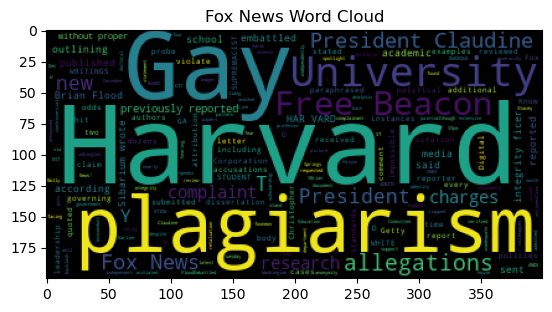

In [343]:
cloud = WordCloud(stopwords=STOPWORDS).generate(fox_text)
plt.imshow(cloud)
plt.title("Fox News Word Cloud")

Text(0.5, 1.0, 'Reuters Word Cloud')

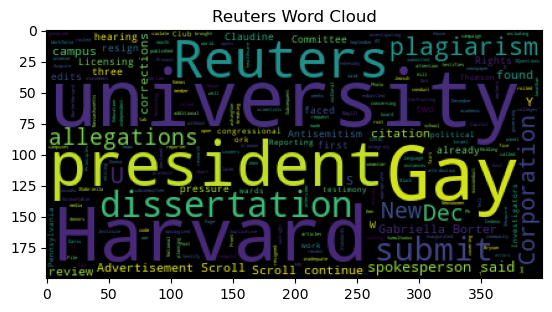

In [345]:
cloud = WordCloud(stopwords=STOPWORDS).generate(r_text)
plt.imshow(cloud)
plt.title("Reuters Word Cloud")

These word clouds show that both articles use the words Harvard, University, Gay, and plagarism quite a bit. Harvard and University are self explanatory. However, the context around Gay and plagarism is important. Harvard's president's name is Claudine Gay and she was accused of plagarising/incorrectly citing parts of her academic writing. In another context, this could be about people who are gay plagarising their work. Furthermore, "Free Beacon" in the Fox word cloud is referring to another news outlet, it is not referring to a beacon being free - whatever that might mean. All in all, when you learn the context of these word clouds, they do a good job at outline the topics present in both articles.